<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/TP1cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)

# Para visuzalización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 16
from IPython.display import Audio, Markdown, Image

def dmd(x):
    display(Markdown(x))

# Números y Datos
import numpy as np
import pandas as pd
import random

# Clustering (scipy)
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Clustering (sklearn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors

# Clustering (otros)
!pip install gower
import gower

!pip install scikit-learn-extra 
from sklearn_extra.cluster import KMedoids 

In [148]:
# LEVANTAMOS EL ARCHIVO PICKLE
import pickle
df_total = pd.read_pickle('df_total.p')
print(df_total.shape)
df_total.head(10)

(4082, 71)


,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
0,00At7PWydsvg7g5xgaYan9,0.354425,0.747412,0.286733,0.296011,0.303938,0.244281,0.300585,0.215238,0.425981,0.295721,0.338112,0.418549,0.630479,0.656402,0.436778,0.553574,0.570886,0.422492,0.545740,0.328688,0.595697,0.633451,0.665306,0.756192,0.942322,0.817997,0.555805,0.430032,0.664287,0.403409,0.520597,0.469829,0.463558,0.582029,0.613871,0.399939,0.253537,0.179836,0.256836,0.318495,0.242994,0.290617,0.318734,0.231227,0.139287,0.252666,0.261510,0.278275,0.698685,Matrix & Futurebound,drum-and-bass,2012,All I Know EP (feat. Luke Bingham),0.533827,0.927814,0.939500,0.057293,0.273092,0.003182,0.026639,0.817259,0.810248,-1.172031,-1.436055,-0.082359,1.566324,-0.929174,-4.315647,2.713416,2.933962
1,00BgcUYkIImsDN5rNjkR1U,0.233490,0.532633,0.119782,0.159206,0.311303,0.206850,0.411964,0.296472,0.577764,0.431916,0.343720,0.283267,0.524528,0.760283,0.262473,0.412054,0.679838,0.539311,0.770593,0.593922,0.793390,0.849812,0.597048,0.708635,0.921531,0.766888,0.395599,0.362725,0.593063,0.302356,0.538773,0.440944,0.328459,0.441780,0.653630,0.447183,0.301479,0.331171,0.300520,0.206070,0.395573,0.283929,0.359724,0.212639,0.321871,0.235968,0.310301,0.411293,0.658823,Maduk,drum-and-bass,2013,Feel Good,0.382664,0.942853,0.949102,0.046208,0.006235,0.557576,0.070934,0.104569,0.814705,-1.250204,-1.091867,-0.940935,-2.044902,-4.104221,0.271967,3.006179,3.154919
2,00WgnFIsY1y84p7mYAJRuF,0.510113,0.361699,0.416151,0.564027,0.381998,0.362252,0.395394,0.643339,0.437220,0.321494,0.458258,0.288363,0.764317,0.626131,0.668801,0.804309,0.630595,0.659452,0.727147,0.754426,0.745920,0.691701,0.657127,0.554382,0.772360,0.725894,0.502340,0.458222,0.515849,0.287753,0.670784,0.440100,0.290859,0.374617,0.782501,0.590861,0.517235,0.268070,0.677909,0.287937,0.521776,0.352472,0.469454,0.215663,0.332264,0.323902,0.290750,0.327383,0.515605,Apex,drum-and-bass,2012,Omega Point EP,0.468288,0.921798,0.855093,0.071529,0.000853,0.823232,0.076613,0.113706,0.815129,-1.088690,-1.062415,-0.907611,-1.957798,-4.512363,1.608711,2.614645,1.858252
3,00X2ieWUjpzdNwDU2Jlg6i,0.570225,0.575522,0.628908,0.371218,0.520357,0.314152,0.328446,0.503845,0.353149,0.402552,0.312743,0.404121,0.708006,0.624321,0.671485,0.445515,0.629442,0.464817,0.464944,0.660873,0.448533,0.627020,0.429563,0.550132,0.918607,0.728133,0.519574,0.339290,0.437220,0.454525,0.568017,0.500888,0.556014,0.518627,0.629329,0.351479,0.166163,0.113579,0.141874,0.217190,0.167308,0.221088,0.233026,0.193597,0.255875,0.268884,0.225137,0.247147,0.652674,The Mighty Mighty Bosstones,ska,2002,A Jackknife to a Swan,0.464059,0.956889,0.897723,0.051925,0.003574,0.000001,0.351575,0.730964,0.419984,-1.208132,-0.441802,-0.130203,1.050987,-4.285910,-4.594985,3.374210,2.286145
4,00isAURAZeKQXv6CW2vckb,0.350877,0.527437,0.231017,0.405664,0.214982,0.358833,0.264363,0.268953,0.415337,0.195314,0.375656,0.170481,0.660800,0.733016,0.441898,0.809989,0.436888,0.734512,0.606309,0.521148,0.705501,0.449678,0.711889,0.379830,0.523043,0.463577,0.573599,0.320815,0.582131,0.457297,0.529303,0.440957,0.700266,0.381577,0.659275,0.292890,0.404852,0.350354,0.259792,0.299978,0.325703,0.132756,0.786040,0.210715,0.593866,0.277373,0.254452,0.632434,0.410900,Gottfried Heinrich Stölzel,classical,2015,Divine Redeemer,0.238901,0.154819,0.575625,0.044224,0.940763,0.446465,0.113061,0.082335,0.320465,-1.265808,-0.909878,-1.034634,-2.285452,2.960621,-0.174584,-1.622804,0.345908
5,00kO4Z0mFAFs6KLlXnaD0f,0.440426,0.730124,0.217593,0.138963,0.079061,0.061542,0.078785,0.142725,0.567773,0.095690,0.12

In [4]:
df_total.columns

Index(['id', 'mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8',
       'mp9', 'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5',
       'sdp6', 'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt0', 'mt1', 'mt2',
       'mt3', 'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm', 'artists', 'genre', 'release_date',
       'album_name', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'speechiness_log', 'liveness_log', 'valence_log', 'valence_logit',
       'acousticness_logit', 'instrumentalness_logit', 'energy_logit',
       'loudness_logit'],
      dtype='object')

In [5]:
df_total.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4082 non-null   object 
 1   mp0                     4082 non-null   float64
 2   mp1                     4082 non-null   float64
 3   mp2                     4082 non-null   float64
 4   mp3                     4082 non-null   float64
 5   mp4                     4082 non-null   float64
 6   mp5                     4082 non-null   float64
 7   mp6                     4082 non-null   float64
 8   mp7                     4082 non-null   float64
 9   mp8                     4082 non-null   float64
 10  mp9                     4082 non-null   float64
 11  mp10                    4082 non-null   float64
 12  mp11                    4082 non-null   float64
 13  sdp0                    4082 non-null   float64
 14  sdp1                    4082 non-null   

In [6]:
df_total[df_total.valence_logit.isna()]

,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
178,0MkFNvK1QrA2aRViGFaZkq,0.527601,0.448624,0.446738,0.465851,0.343305,0.705478,0.335960,0.279197,0.250257,0.306987,0.756909,0.550856,0.735940,0.590683,0.536880,0.729231,0.382931,0.755715,0.444147,0.362609,0.337769,0.365515,0.779255,0.705974,0.847641,0.790388,0.389105,0.335220,0.316117,0.552631,0.421001,0.448114,0.433415,0.500493,0.577389,0.558724,0.155939,0.151703,0.254872,0.318736,0.157663,0.334035,0.310969,0.195287,0.160984,0.340178,0.266325,0.317327,0.565736,Bad Manners,ska,2012,Hi-Ho Silver Lining,0.676533,0.951876,0.835714,0.061144,0.036044,0.000922,0.030563,0.993909,0.691470,-1.147865,-1.391873,0.001694,NaN,-3.031016,-4.505974,3.228036,1.701372
411,0mZGuHBj9R2Hi1DSarkCUq,0.433181,0.499803,0.350324,0.501229,0.312999,0.368435,0.239917,0.449915,0.527641,0.240688,0.345695,0.253514,0.706460,0.735052,0.420373,0.749103,0.515245,0.685894,0.527906,0.630374,0.744032,0.473592,0.587494,0.428458,0.719295,0.771405,0.346494,0.439397,0.372177,0.587122,0.393259,0.541099,0.551528,0.485550,0.608002,0.546388,0.283729,0.237048,0.354762,0.414893,0.382157,0.506945,0.299759,0.309214,0.289199,0.431122,0.481559,0.379005,0.492565,Skankin' Pickle,ska,1996,The Green Album,0.567653,0.664133,0.742755,0.061144,0.044679,0.062525,0.168818,1.000000,0.659185,-1.147865,-0.747589,0.004321,NaN,-2.850050,-2.548531,0.726939,1.113358
681,1K0DdaxLaP2PszBxIBkULQ,0.617581,0.272246,0.334441,0.191885,0.449302,0.322807,0.362940,0.561655,0.240913,0.254043,0.285282,0.527013,0.846247,0.348004,0.615089,0.274403,0.595964,0.633297,0.598305,0.634497,0.428071,0.552459,0.463259,0.679987,0.856989,0.732621,0.491911,0.367187,0.386586,0.706241,0.429173,0.489812,0.355080,0.357607,0.507970,0.450823,0.278152,0.135892,0.198125,0.483648,0.335907,0.516075,0.356953,0.291579,0.465851,0.342556,0.582060,0.348874,0.574486,MU330,ska,2002,Ultra Panic,0.625793,0.623027,0.864083,0.053442,0.309237,0.000000,0.229737,0.991878,0.666761,-1.197621,-0.620265,0.000815,NaN,-0.757281,-4.595120,0.545225,1.937550
1829,3UnyYyMkoUx1I5TbRgtg11,0.325413,0.476658,0.453488,0.266607,0.460992,0.299072,0.421327,0.264049,0.417427,0.478502,0.228122,0.353169,0.557632,0.565908,0.744651,0.371141,0.724077,0.406420,0.705079,0.392265,0.601206,0.767516,0.361797,0.493709,0.834834,0.873446,0.304148,0.287361,0.373606,0.567874,0.277289,0.472763,0.573591,0.617346,0.606831,0.194756,0.326142,0.126305,0.330686,0.237507,0.239024,0.262632,0.255412,0.203597,0.265706,0.365662,0.335468,0.323564,0.554684,Madness,ska,2009,Total Madness (2012),0.727273,0.911772,0.843566,0.033839,0.006004,0.000032,0.049458,0.997970,0.596636,-1.358140,-1.225790,0.003447,NaN,-4.118782,-4.591870,2.466674,1.762849
2290,4NN6gFlTNVathWA3e4QTXp,0.363223,0.579369,0.618503,0.406847,0.353380,0.220382,0.366638,0.447615,0.384201,0.338057,0.326709,0.347610,0.612599,0.626542,0.706763,0.709453,0.535721,0.310128,0.575734,0.710033,0.465903,0.506680,0.465777,0.566039,0.761588,0.816090,0.383159,0.473322,0.281600,0.741630,0.422925,0.410228,0.485003,0.654821,0.383204,0.317573,0.211149,0.138720,0.375861,0.610137,0.248805,0.750001,0.348806,0.304648,0.270001,0.458059,0.565465,0.361546,0.510349,The English Beat,ska,1979,Tears of A Clown,0.793869,0.844599,0.795315,0.055659,0.023193,0.000568,0.005885,0.995939,0.731816,-1.182704,-1.799002,0.002572,NaN,-3.371667,-4.539331,1.771136,1.419850
2761,5K16Je2j1RTFrh7VqjEPcl,0.414592,0.398214,0.365275,0.337834,0.544161,0.446754,0.433489,0.434250,0.411771,0.459370,0.371104,0.436044,0.655735,0.588804,0.547882,0.501688,0.631155,0.635436,0.643862,0.595896,0.6507

In [159]:
import matplotlib.cm as cm

def grafica_silhouette_2(labels_,d):
  silhouette_avg = silhouette_score(d,labels_,metric='precomputed')
  sample_silhouette_values = silhouette_samples(d,labels_,metric='precomputed')

  plt.rcParams['figure.figsize'] = (8,6)
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(labels_) + (k + 1) * 10])

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[labels_ == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                "with k = %d" % k),
                fontsize=14, fontweight='bold')
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

# Categorias de genero transformadas a número
death-metal        4            
ska                1            
drum-and-bass      0            
trance             6            
opera              5            
singer-songwriter  8            
ambient            7            
jazz               3            
classical          2     


#Todas las variables numéricas, elimino NA#

In [7]:
DF = df_total.drop(['id','artists','album_name','release_date','mt0','valence','acousticness', 
                   'instrumentalness','energy','loudness'], axis=1)
#DF = df_total.drop(['id','artists','album_name','release_date'], axis=1)   

In [8]:
DF.columns

Index(['mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11', 'mt1', 'mt2', 'mt3', 'mt4',
       'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0', 'sdt1',
       'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9', 'sdt10',
       'sdt11', 'mt0_norm', 'genre', 'danceability', 'speechiness', 'liveness',
       'tempo', 'speechiness_log', 'liveness_log', 'valence_log',
       'valence_logit', 'acousticness_logit', 'instrumentalness_logit',
       'energy_logit', 'loudness_logit'],
      dtype='object')

In [9]:
DF.describe()

,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,danceability,speechiness,liveness,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4072.000000,3883.000000,4076.000000,3987.000000,4080.000000
mean,0.423272,0.423572,0.353962,0.316589,0.370451,0.347341,0.326951,0.377515,0.366869,0.335787,0.355752,0.359382,0.675741,0.609789,0.552372,0.540770,0.566645,0.584126,0.552165,0.589333,0.569079,0.607693,0.579709,0.609147,0.652434,0.454329,0.347099,0.488849,0.455531,0.498971,0.451841,0.501737,0.454321,0.649670,0.455323,0.347884,0.294116,0.355238,0.343339,0.309646,0.299003,0.383638,0.237526,0.333564,0.332525,0.305088,0.365583,0.499820,0.467091,0.077912,0.179050,0.568494,-1.121462,-0.851121,-0.609834,-0.771688,-0.958999,-1.214661,0.483124,1.259677
std,0.159062,0.170415,0.145745,0.133497,0.140917,0.139016,0.132923,0.138726,0.149836,0.132053,0.152625,0.142635,0.127206,0.119438,0.148457,0.158454,0.145660,0.157576,0.143710,0.139580,0.149576,0.147409,0.153142,0.156341,0.149923,0.137816,0.086089,0.139687,0.132954,0.119778,0.068404,0.114588,0.114920,0.113207,0.106899,0.144550,0.132992,0.148998,0.150020,0.115805,0.150634,0.139610,0.101092,0.126101,0.123216,0.133927,0.131261,0.096604,0.196402,0.066009,0.171933,0.153869,0.212149,0.317548,0.408604,1.649446,3.432915,2.955575,2.322026,0.935900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-4.595120,-4.595120,-4.595120,-4.595120,-4.595120
25%,0.310479,0.297935,0.248284,0.221841,0.270508,0.251850,0.235678,0.281424,0.257842,0.247190,0.247666,0.257582,0.605565,0.548565,0.458183,0.441066,0.470723,0.475537,0.460192,0.504140,0.479849,0.518175,0.483594,0.514859,0.565341,0.362424,0.291169,0.410262,0.376519,0.428919,0.415901,0.428507,0.373986,0.587025,0.388019,0.248140,0.198744,0.254021,0.228980,0.230704,0.185251,0.291050,0.164891,0.248917,0.245990,0.206017,0.277027,0.435079,0.312896,0.044224,0.077336,0.440802,-1.265808,-1.058806,-0.925808,-2.005473,-4.461733,-4.523848,-1.262977,0.626074
50%,0.422400,0.415484,0.347690,0.309562,0.365382,0.337414,0.316728,0.370589,0.355489,0.324698,0.344498,0.354061,0.690912,0.622150,0.564649,0.544285,0.573727,0.589771,0.559416,0.602079,0.578128,0.620356,0.584375,0.615629,0.673848,0.439126,0.346166,0.490571,0.456101,0.503711,0.452339,0.501915,0.451262,0.657730,0.456188,0.341995,0.289884,0.348842,0.331097,0.300413,0.285703,0.372724,0.227996,0.317910,0.319291,0.292246,0.351062,0.499853,0.476216,0.054492,0.105834,0.578489,-1.190491,-0.936165,-0.543418,-0.916683,-1.631577,-1.273929,0.277207,1.353399
75%,0.537655,0.551067,0.450179,0.398198,0.459756,0.435823,0.408878,0.466254,0.457089,0.411734,0.451333,0.447462,0.762660,0.688544,0

In [10]:
DF = DF.dropna()


In [11]:
DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4081
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mp0                     3772 non-null   float64
 1   mp1                     3772 non-null   float64
 2   mp2                     3772 non-null   float64
 3   mp3                     3772 non-null   float64
 4   mp4                     3772 non-null   float64
 5   mp5                     3772 non-null   float64
 6   mp6                     3772 non-null   float64
 7   mp7                     3772 non-null   float64
 8   mp8                     3772 non-null   float64
 9   mp9                     3772 non-null   float64
 10  mp10                    3772 non-null   float64
 11  mp11                    3772 non-null   float64
 12  sdp0                    3772 non-null   float64
 13  sdp1                    3772 non-null   float64
 14  sdp2                    3772 non-null   

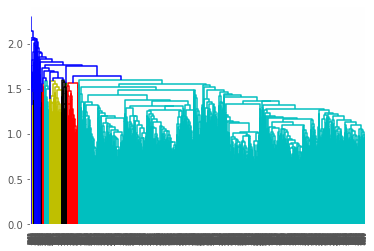

In [12]:
DF1=DF.drop(['genre'], axis=1)
DF1=scaler.fit_transform(DF1)
z = linkage(DF1, method='average', metric='euclidean')
plt.figure()
dn = dendrogram(z)

In [224]:
kmeans1M = KMedoids(n_clusters=9, random_state=0).fit(DF1)

tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1M.labels_})
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,12,56,13,105,3,173,5,19,32
classical,9,8,1,25,3,245,1,8,11
death-metal,37,3,3,4,2,1,369,3,3
drum-and-bass,16,37,148,39,7,0,195,7,9
jazz,33,46,12,84,34,34,11,62,80
opera,35,0,9,2,76,235,0,29,8
singer-songwriter,87,15,74,28,17,19,6,25,174
ska,37,43,28,13,55,0,159,15,111
trance,19,123,87,22,5,2,149,16,41


In [225]:
kmeans1 = KMeans(n_clusters=9, random_state=0).fit(DF1)

tmp1 = pd.DataFrame({'Labels': DF.genre, 'Clusters': kmeans1.labels_})# Create a DataFrame with labels and varieties as columns: df
ct1 = pd.crosstab(tmp1['Labels'], tmp1['Clusters']) # Create crosstab: ct
ct1

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,177,16,5,1,1,17,17,132,52
classical,143,13,54,1,0,7,1,92,0
death-metal,5,1,1,398,5,0,13,2,0
drum-and-bass,2,2,0,4,55,1,316,0,78
jazz,17,71,16,2,21,214,9,13,33
opera,13,37,298,0,3,26,2,15,0
singer-songwriter,13,238,2,0,62,117,1,10,2
ska,0,40,0,12,352,40,5,0,12
trance,2,8,0,2,58,8,150,4,232


In [192]:
df_total_2 = df_total
df_total_2 = df_total_2.dropna()
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [219]:
DF1.shape

(3772, 60)

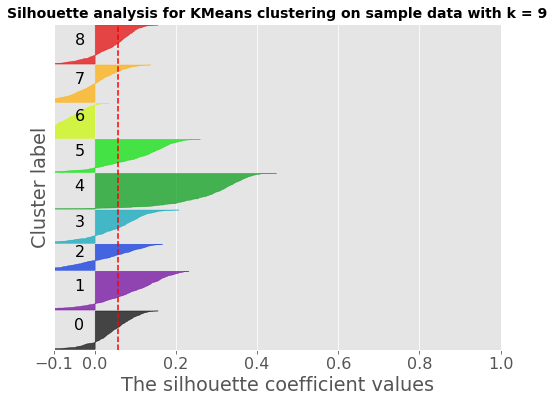

In [193]:
d_meta_total = DF1
d_meta_total = gower.gower_matrix(d_meta_total)

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

Los generos que estan peor clasificados son, 6-trace y 7-ambiente. Se destacan bien clasificados el 4 -death-metal y 5- opera. Los generos 1-ska y 0- drum-and-bass, bastante bien clasificados tambien.

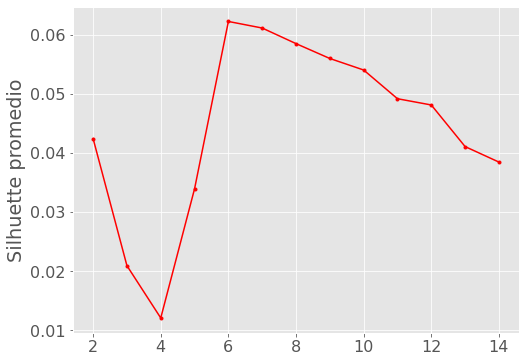

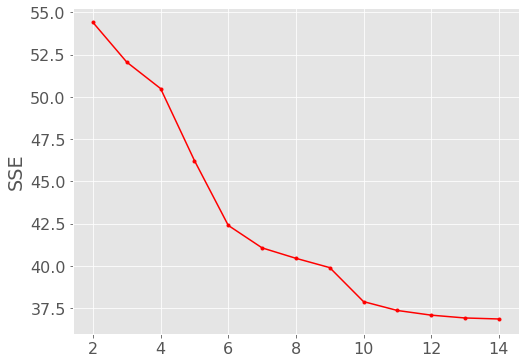

In [194]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


In [ ]:
Si tomamos todas las variables numericas del dataframe completo, la cantidad de clusters sugeridos, son 6.

In [216]:
df_total

,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit,genre_num
0,00At7PWydsvg7g5xgaYan9,0.354425,0.747412,0.286733,0.296011,0.303938,0.244281,0.300585,0.215238,0.425981,0.295721,0.338112,0.418549,0.630479,0.656402,0.436778,0.553574,0.570886,0.422492,0.545740,0.328688,0.595697,0.633451,0.665306,0.756192,0.942322,0.817997,0.555805,0.430032,0.664287,0.403409,0.520597,0.469829,0.463558,0.582029,0.613871,0.399939,0.253537,0.179836,0.256836,0.318495,0.242994,0.290617,0.318734,0.231227,0.139287,0.252666,0.261510,0.278275,0.698685,Matrix & Futurebound,drum-and-bass,2012,All I Know EP (feat. Luke Bingham),0.533827,0.927814,0.939500,0.057293,0.273092,0.003182,0.026639,0.817259,0.810248,-1.172031,-1.436055,-0.082359,1.566324,-0.929174,-4.315647,2.713416,2.933962,0
1,00BgcUYkIImsDN5rNjkR1U,0.233490,0.532633,0.119782,0.159206,0.311303,0.206850,0.411964,0.296472,0.577764,0.431916,0.343720,0.283267,0.524528,0.760283,0.262473,0.412054,0.679838,0.539311,0.770593,0.593922,0.793390,0.849812,0.597048,0.708635,0.921531,0.766888,0.395599,0.362725,0.593063,0.302356,0.538773,0.440944,0.328459,0.441780,0.653630,0.447183,0.301479,0.331171,0.300520,0.206070,0.395573,0.283929,0.359724,0.212639,0.321871,0.235968,0.310301,0.411293,0.658823,Maduk,drum-and-bass,2013,Feel Good,0.382664,0.942853,0.949102,0.046208,0.006235,0.557576,0.070934,0.104569,0.814705,-1.250204,-1.091867,-0.940935,-2.044902,-4.104221,0.271967,3.006179,3.154919,0
2,00WgnFIsY1y84p7mYAJRuF,0.510113,0.361699,0.416151,0.564027,0.381998,0.362252,0.395394,0.643339,0.437220,0.321494,0.458258,0.288363,0.764317,0.626131,0.668801,0.804309,0.630595,0.659452,0.727147,0.754426,0.745920,0.691701,0.657127,0.554382,0.772360,0.725894,0.502340,0.458222,0.515849,0.287753,0.670784,0.440100,0.290859,0.374617,0.782501,0.590861,0.517235,0.268070,0.677909,0.287937,0.521776,0.352472,0.469454,0.215663,0.332264,0.323902,0.290750,0.327383,0.515605,Apex,drum-and-bass,2012,Omega Point EP,0.468288,0.921798,0.855093,0.071529,0.000853,0.823232,0.076613,0.113706,0.815129,-1.088690,-1.062415,-0.907611,-1.957798,-4.512363,1.608711,2.614645,1.858252,0
3,00X2ieWUjpzdNwDU2Jlg6i,0.570225,0.575522,0.628908,0.371218,0.520357,0.314152,0.328446,0.503845,0.353149,0.402552,0.312743,0.404121,0.708006,0.624321,0.671485,0.445515,0.629442,0.464817,0.464944,0.660873,0.448533,0.627020,0.429563,0.550132,0.918607,0.728133,0.519574,0.339290,0.437220,0.454525,0.568017,0.500888,0.556014,0.518627,0.629329,0.351479,0.166163,0.113579,0.141874,0.217190,0.167308,0.221088,0.233026,0.193597,0.255875,0.268884,0.225137,0.247147,0.652674,The Mighty Mighty Bosstones,ska,2002,A Jackknife to a Swan,0.464059,0.956889,0.897723,0.051925,0.003574,0.000001,0.351575,0.730964,0.419984,-1.208132,-0.441802,-0.130203,1.050987,-4.285910,-4.594985,3.374210,2.286145,1
4,00isAURAZeKQXv6CW2vckb,0.350877,0.527437,0.231017,0.405664,0.214982,0.358833,0.264363,0.268953,0.415337,0.195314,0.375656,0.170481,0.660800,0.733016,0.441898,0.809989,0.436888,0.734512,0.606309,0.521148,0.705501,0.449678,0.711889,0.379830,0.523043,0.463577,0.573599,0.320815,0.582131,0.457297,0.529303,0.440957,0.700266,0.381577,0.659275,0.292890,0.404852,0.350354,0.259792,0.299978,0.325703,0.132756,0.786040,0.210715,0.593866,0.277373,0.254452,0.632434,0.410900,Gottfried Heinrich Stölzel,classical,2015,Divine Redeemer,0.238901,0.154819,0.575625,0.044224,0.940763,0.446465,0.113061,0.082335,0.320465,-1.265808,-0.909878,-1.034634,-2.285452,2.960621,-0.174584,-1.622804,0.345908,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [190]:
df_total[['genre','genre_num']].value_counts()

genre              genre_num
death-metal        4            486
ska                1            477
drum-and-bass      0            477
trance             6            475
opera              5            461
singer-songwriter  8            447
ambient            7            442
jazz               3            421
classical          2            396
dtype: int64

#Solo con las variables de timbres y pitches#

In [15]:
DF2 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','mt0'], axis=1)   

In [16]:
DF2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mp0       4082 non-null   float64
 1   mp1       4082 non-null   float64
 2   mp2       4082 non-null   float64
 3   mp3       4082 non-null   float64
 4   mp4       4082 non-null   float64
 5   mp5       4082 non-null   float64
 6   mp6       4082 non-null   float64
 7   mp7       4082 non-null   float64
 8   mp8       4082 non-null   float64
 9   mp9       4082 non-null   float64
 10  mp10      4082 non-null   float64
 11  mp11      4082 non-null   float64
 12  sdp0      4082 non-null   float64
 13  sdp1      4082 non-null   float64
 14  sdp2      4082 non-null   float64
 15  sdp3      4082 non-null   float64
 16  sdp4      4082 non-null   float64
 17  sdp5      4082 non-null   float64
 18  sdp6      4082 non-null   float64
 19  sdp7      4082 non-null   float64
 20  sdp8      4082 non-null   floa

In [17]:
kmeans2 = KMeans(n_clusters=9, random_state=0).fit(DF2)
kmeans2.labels_

array([1, 5, 6, ..., 5, 3, 2], dtype=int32)

In [18]:
tmp2 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans2.labels_})# Create a DataFrame with labels and varieties as columns: df
ct2 = pd.crosstab(tmp2['Labels'], tmp2['Clusters']) # Create crosstab: ct
ct2

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,100,21,5,115,75,61,35,7,23
classical,101,16,2,51,69,66,1,86,4
death-metal,2,36,440,1,2,1,3,1,0
drum-and-bass,3,184,5,14,6,12,226,1,26
jazz,14,43,0,48,23,14,32,30,217
opera,19,18,0,33,36,34,0,308,13
singer-songwriter,53,35,0,87,109,65,4,0,94
ska,2,270,31,9,7,12,18,0,128
trance,3,98,4,10,13,15,298,2,32


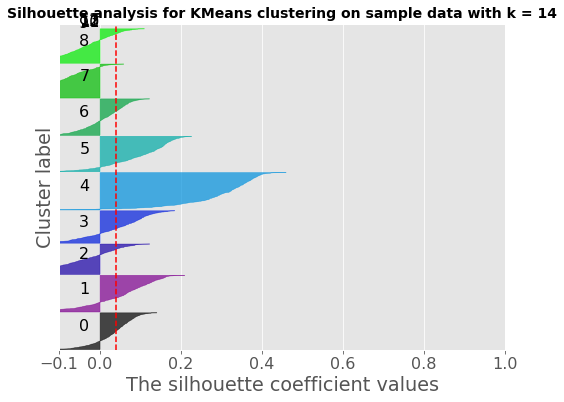

In [195]:
df_total_2 = df_total
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

d_meta_total = DF2
d_meta_total = gower.gower_matrix(d_meta_total)

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

Los generos que estan peor clasificados sin 8 -singer-songwriter, 7-ambient , 2-classical, en menor medida 6- trance . Al igual que en el caso anterior, estan bien clasificados el 4 -death-metal y 5- opera. Y los generos 1-ska y 0- drum-and-bass, bastante bien clasificados tambien.

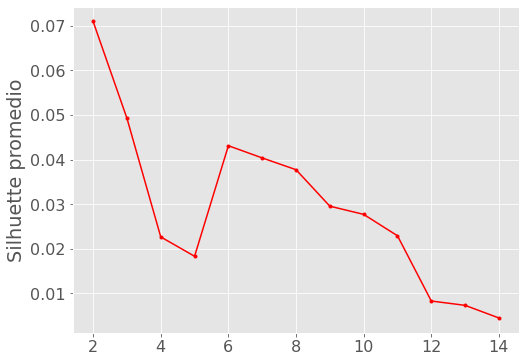

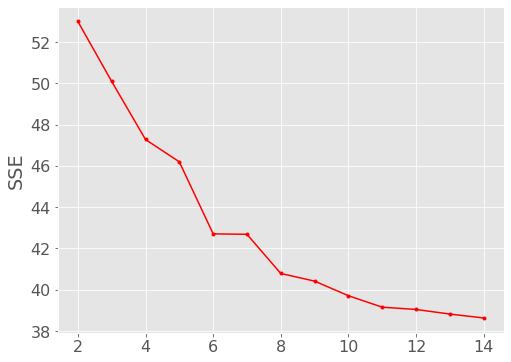

In [196]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


Para esta combinacion de variables, la cantidad de clusters optimo es de 6, al igual que el caso anterior.

#Solo con las variables de timbres#

In [23]:
DF3 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','mp0', 'mp1', 'mp2', 'mp3', 'mp4', 'mp5', 'mp6', 'mp7', 'mp8', 'mp9',
       'mp10', 'mp11', 'sdp0', 'sdp1', 'sdp2', 'sdp3', 'sdp4', 'sdp5', 'sdp6',
       'sdp7', 'sdp8', 'sdp9', 'sdp10', 'sdp11','mt0_norm'], axis=1)   

In [20]:
DF3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mt0     4082 non-null   float64
 1   mt1     4082 non-null   float64
 2   mt2     4082 non-null   float64
 3   mt3     4082 non-null   float64
 4   mt4     4082 non-null   float64
 5   mt5     4082 non-null   float64
 6   mt6     4082 non-null   float64
 7   mt7     4082 non-null   float64
 8   mt8     4082 non-null   float64
 9   mt9     4082 non-null   float64
 10  mt10    4082 non-null   float64
 11  mt11    4082 non-null   float64
 12  sdt0    4082 non-null   float64
 13  sdt1    4082 non-null   float64
 14  sdt2    4082 non-null   float64
 15  sdt3    4082 non-null   float64
 16  sdt4    4082 non-null   float64
 17  sdt5    4082 non-null   float64
 18  sdt6    4082 non-null   float64
 19  sdt7    4082 non-null   float64
 20  sdt8    4082 non-null   float64
 21  sdt9    4082 non-null   float64
 22  

In [24]:
kmeans3 = KMeans(n_clusters=9, random_state=0).fit(DF3)
kmeans3.labels_

array([3, 3, 7, ..., 1, 1, 5], dtype=int32)

In [25]:
tmp3 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans3.labels_})# Create a DataFrame with labels and varieties as columns: df
ct3= pd.crosstab(tmp3['Labels'], tmp3['Clusters']) # Create crosstab: ct
ct3

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,1,112,16,20,134,9,16,13,121
classical,3,16,78,0,63,4,1,1,230
death-metal,2,0,0,41,1,435,0,2,5
drum-and-bass,17,5,0,267,0,6,20,161,1
jazz,74,145,23,19,7,1,126,14,12
opera,19,25,333,6,3,0,4,0,71
singer-songwriter,70,247,2,49,0,1,64,2,12
ska,265,4,0,119,0,27,58,4,0
trance,7,3,2,169,2,1,42,245,4


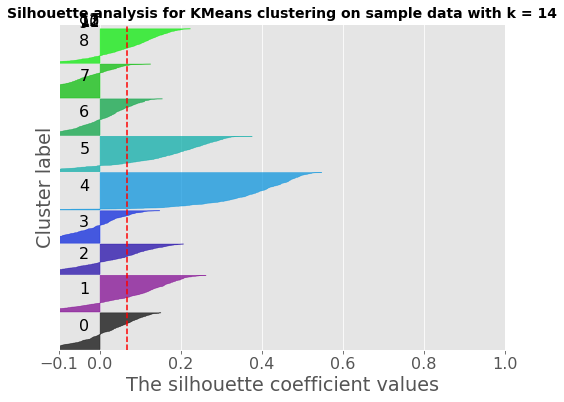

In [197]:
df_total_2 = df_total
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

d_meta_total = DF3
d_meta_total = gower.gower_matrix(d_meta_total)

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

Los generos que estan peor clasificados sin  7-ambient , 6- trance, 3-jazz , 0-drum-and-bass. El genero 4-death-metal, esta muy bien clasificado. Mientras que el 5-opera  y 1-ska , con una buena clasificacion

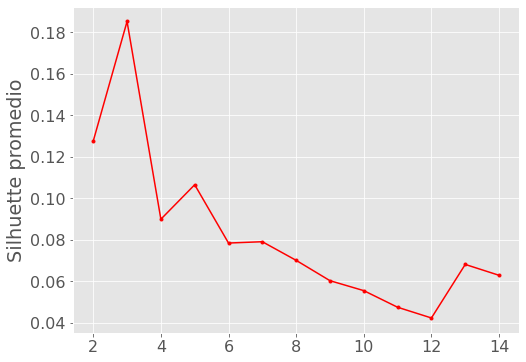

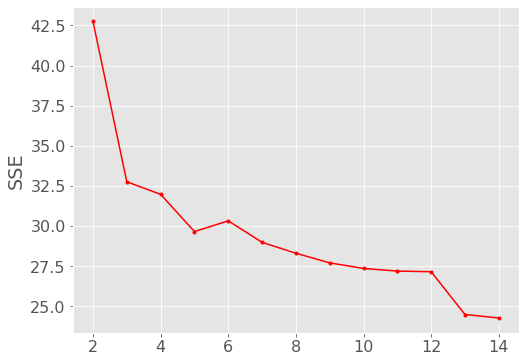

In [198]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

Si consideramos solo los atributos de timbres, la cantidad de clusters que mejor clasificac sería de 3.

#Solo con las variables de pitches

In [60]:
DF4 = df_total.drop(['id','artists','album_name','release_date','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre','mt0', 'mt1', 'mt2', 'mt3',
       'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'sdt0',
       'sdt1', 'sdt2', 'sdt3', 'sdt4', 'sdt5', 'sdt6', 'sdt7', 'sdt8', 'sdt9',
       'sdt10', 'sdt11', 'mt0_norm'], axis=1)   

In [61]:
DF4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mp0     4082 non-null   float64
 1   mp1     4082 non-null   float64
 2   mp2     4082 non-null   float64
 3   mp3     4082 non-null   float64
 4   mp4     4082 non-null   float64
 5   mp5     4082 non-null   float64
 6   mp6     4082 non-null   float64
 7   mp7     4082 non-null   float64
 8   mp8     4082 non-null   float64
 9   mp9     4082 non-null   float64
 10  mp10    4082 non-null   float64
 11  mp11    4082 non-null   float64
 12  sdp0    4082 non-null   float64
 13  sdp1    4082 non-null   float64
 14  sdp2    4082 non-null   float64
 15  sdp3    4082 non-null   float64
 16  sdp4    4082 non-null   float64
 17  sdp5    4082 non-null   float64
 18  sdp6    4082 non-null   float64
 19  sdp7    4082 non-null   float64
 20  sdp8    4082 non-null   float64
 21  sdp9    4082 non-null   float64
 22  

In [64]:
kmeans4 = KMeans(n_clusters=9, random_state=0).fit(DF4)
kmeans4.labels_

array([6, 6, 7, ..., 6, 5, 3], dtype=int32)

In [65]:
tmp4 = pd.DataFrame({'Labels': df_total.genre, 'Clusters': kmeans4.labels_})# Create a DataFrame with labels and varieties as columns: df
ct4= pd.crosstab(tmp4['Labels'], tmp4['Clusters']) # Create crosstab: ct
ct4

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,6,57,41,39,79,84,56,33,47
classical,2,51,81,6,79,30,62,18,67
death-metal,395,2,3,21,1,1,1,50,12
drum-and-bass,11,0,22,131,0,9,21,215,68
jazz,11,5,165,33,19,35,20,47,86
opera,2,21,131,6,27,48,69,42,115
singer-songwriter,2,67,70,15,60,60,71,14,88
ska,70,3,40,53,7,19,37,88,160
trance,38,0,16,202,0,6,18,123,72


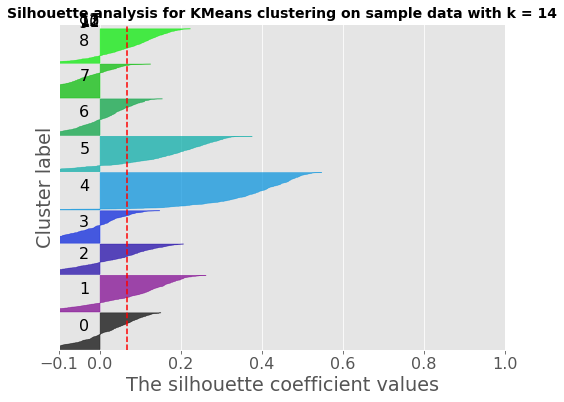

In [201]:
df_total_2 = df_total
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

d_meta_total = DF3
d_meta_total = gower.gower_matrix(d_meta_total)

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

El genero 7-ambient, es el peor clasificado. Le siguen en menor medida el 3-jazz,6-trance . El mejor clasificado es 4-death-metal, le siguen el 5-opera  y 1-ska , con una buena clasificacion



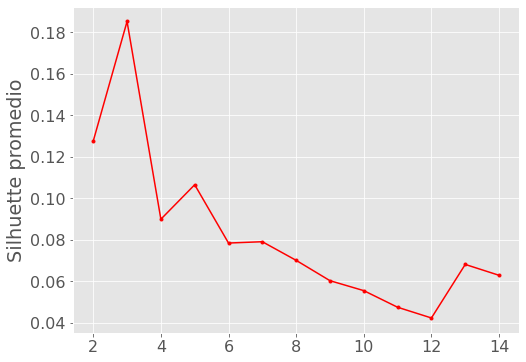

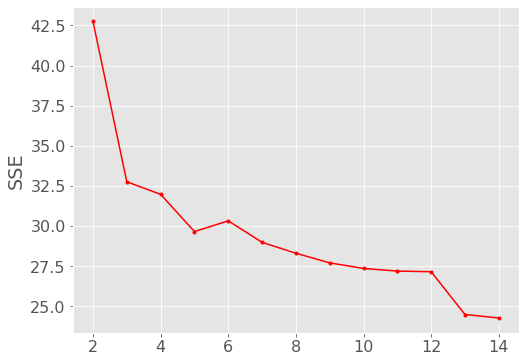

In [202]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

Para este conjunto de datos, los clusters optimos son 3.

#Solo con Audio Features (Alto Nivel)

In [66]:
DF5 = df_total[['danceability', 'tempo', 'speechiness_log', 'liveness_log',
       'valence_log', 'valence_logit', 'acousticness_logit',
       'instrumentalness_logit', 'energy_logit', 'loudness_logit','genre']] 
DF5.head()

,danceability,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit,genre
0,0.533827,0.810248,-1.172031,-1.436055,-0.082359,1.566324,-0.929174,-4.315647,2.713416,2.933962,drum-and-bass
1,0.382664,0.814705,-1.250204,-1.091867,-0.940935,-2.044902,-4.104221,0.271967,3.006179,3.154919,drum-and-bass
2,0.468288,0.815129,-1.088690,-1.062415,-0.907611,-1.957798,-4.512363,1.608711,2.614645,1.858252,drum-and-bass
3,0.464059,0.419984,-1.208132,-0.441802,-0.130203,1.050987,-4.285910,-4.594985,3.374210,2.286145,ska
4,0.238901,0.320465,-1.265808,-0.909878,-1.034634,-2.285452,2.960621,-0.174584,-1.622804,0.345908,classical


In [67]:
DF5.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   danceability            4082 non-null   float64
 1   tempo                   4082 non-null   float64
 2   speechiness_log         4082 non-null   float64
 3   liveness_log            4082 non-null   float64
 4   valence_log             4082 non-null   float64
 5   valence_logit           4072 non-null   float64
 6   acousticness_logit      3883 non-null   float64
 7   instrumentalness_logit  4076 non-null   float64
 8   energy_logit            3987 non-null   float64
 9   loudness_logit          4080 non-null   float64
 10  genre                   4082 non-null   object 
dtypes: float64(10), object(1)
memory usage: 382.7+ KB


In [68]:
DF5 = DF5.dropna()
DF5.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3772 entries, 0 to 4081
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   danceability            3772 non-null   float64
 1   tempo                   3772 non-null   float64
 2   speechiness_log         3772 non-null   float64
 3   liveness_log            3772 non-null   float64
 4   valence_log             3772 non-null   float64
 5   valence_logit           3772 non-null   float64
 6   acousticness_logit      3772 non-null   float64
 7   instrumentalness_logit  3772 non-null   float64
 8   energy_logit            3772 non-null   float64
 9   loudness_logit          3772 non-null   float64
 10  genre                   3772 non-null   object 
dtypes: float64(10), object(1)
memory usage: 353.6+ KB


In [69]:
DF6=DF5.drop(['genre'], axis=1)

In [70]:
kmeans6 = KMeans(n_clusters=9, random_state=0).fit(DF6)
kmeans6.labels_

array([7, 2, 6, ..., 3, 3, 2], dtype=int32)

In [71]:
tmp6 = pd.DataFrame({'Labels': DF5.genre, 'Clusters': kmeans6.labels_})# Create a DataFrame with labels and varieties as columns: df
ct6= pd.crosstab(tmp6['Labels'], tmp6['Clusters']) # Create crosstab: ct
ct6

Clusters,0,1,2,3,4,5,6,7,8
Labels,,,,,,,,,
ambient,1,48,3,10,10,101,66,0,179
classical,0,6,0,9,36,157,0,0,103
death-metal,155,1,206,2,0,1,56,0,4
drum-and-bass,165,4,140,2,0,0,132,15,0
jazz,1,93,0,144,42,44,16,16,40
opera,0,4,0,67,286,28,0,0,9
singer-songwriter,25,15,0,275,47,6,3,67,7
ska,90,36,3,16,0,1,6,309,0
trance,129,10,60,5,0,2,228,28,2


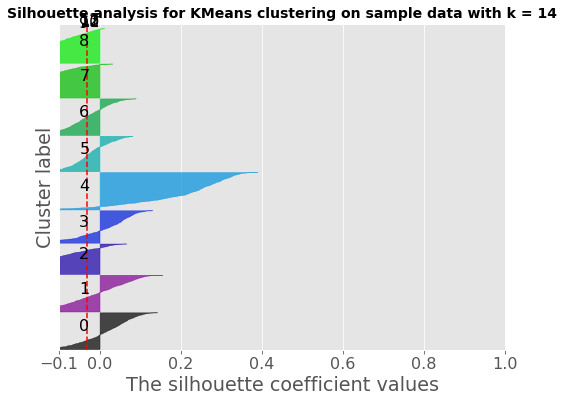

In [203]:
df_total_2 = df_total
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

d_meta_total = DF6
d_meta_total = gower.gower_matrix(d_meta_total)

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

A excepcion del genero 4 -death-metal, los demas generos estan mal clasificados

In [227]:
DF5.shape

(3772, 11)

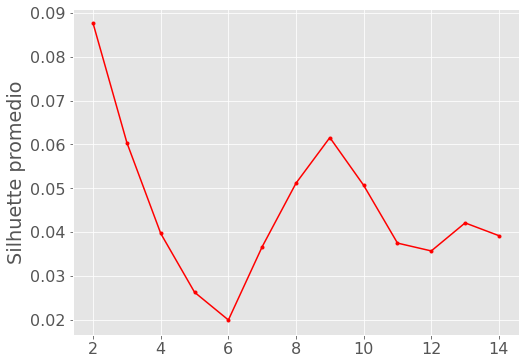

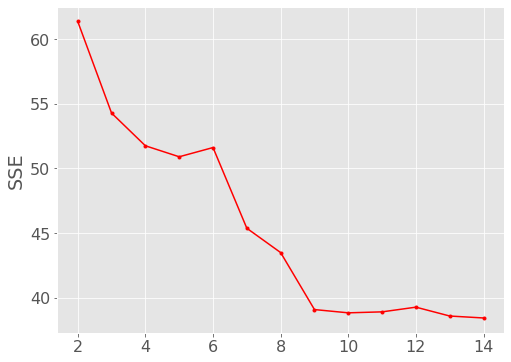

In [204]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()

In [ ]:
La cantidad optima de Clusters para este conjunto de datos es 9.

#Hopkins#
Tendencia al Clustering

In [72]:
def Hopkins(df,*args):
    n = df.shape[0] # filas
    d = df.shape[1] # columnas
    if not args:
        print("Numero de puntos al azar por defecto")
        m = int(0.1 * n) # cantidad de puntos al azar (default)
    else:
        m = args[0] # cantidad de puntos al azar

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(df) # buscador de vecinos

    rand_ind = random.sample(range(0, n, 1), m) # indices al azar

    ui = []
    wi = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, d)).reshape(1, -1), 2, return_distance=True) # distancia a los nuevos puntos
        ui.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(df[rand_ind[j]].reshape(1, -1), 2, return_distance=True) # distancia a los puntos al azar
        wi.append(w_dist[0][1])

    H = sum(wi) / (sum(ui) + sum(wi))
    return H

In [73]:
DF1=scaler.fit_transform(DF1)
Hopkins (DF1)

Numero de puntos al azar por defecto


0.07765466078396903

In [74]:
DF2=scaler.fit_transform(DF2)
Hopkins(DF2)

Numero de puntos al azar por defecto


0.0730507543724765

In [75]:
DF3=scaler.fit_transform(DF3)
Hopkins(DF3)

Numero de puntos al azar por defecto


0.05582478521424547

In [76]:
DF4=scaler.fit_transform(DF4)
Hopkins(DF4)

Numero de puntos al azar por defecto


0.06422745855675586

In [77]:
DF6=scaler.fit_transform(DF4)
Hopkins(DF6)

Numero de puntos al azar por defecto


0.06358173278118866

#Criterio de van Dongen#
Validación Externa

In [93]:
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [94]:
vanDongen(ct1)
# este es el mejor indice

0.43216311513107464

In [95]:
vanDongen(ct2)

0.5973839298548225

In [96]:
vanDongen(ct3)

0.5124499141385231

In [97]:

vanDongen(ct4)

0.7475226195605342

In [98]:
vanDongen(ct6)

0.5675468222290452

Efecto Uniforme

Es importante hacer este tipo de evaluaciones porque el método de k-medias tiende a formar grupos de tamaño uniforme, aun cuando las clases sean claramente no balanceadas. Esto se llama el "efecto uniforme". Una forma rápida de evaluarlo es calcular el coeficiente de variación (CV = desvío estándar/media) de la distribución del tamaño de las clases.
En forma empírica se mostró que si las clases presentan un CV mayor que 0.85 es bastante posible que el método de k-medias introduzca alguna distorsión en el resultado. Si se están probando variaciones de métodos o parámetros de clustering, una forma rápida de evaluar el efecto uniforme es calcular diferencias entre el CV de las clases conocidas y las de las variantes probadas. El método de k-medias también puede ser sensible a diferencias en densidad de los grupos y a la presencia de grupos no esféricos.

In [99]:
np.std(kmeans1.labels_)/np.mean(kmeans1.labels_)


0.621008204440644

In [100]:
np.std(kmeans2.labels_)/np.mean(kmeans2.labels_)

0.6530164698546019

In [102]:
np.std(kmeans3.labels_)/np.mean(kmeans3.labels_)

0.6858840807508544

In [103]:
np.std(kmeans4.labels_)/np.mean(kmeans4.labels_)

0.6428416086346397

In [104]:
np.std(kmeans6.labels_)/np.mean(kmeans6.labels_)

0.6532211231164359

#Indice Rand#
Validación Externa

In [105]:
from sklearn.metrics import adjusted_rand_score

In [106]:
# este es el mejor indice
ari1 = adjusted_rand_score(DF.genre, kmeans1.labels_)
ari1

0.41314241839677757

In [107]:
ari2 = adjusted_rand_score(df_total.genre, kmeans2.labels_)
ari2

0.2891483283442294

In [108]:
ari3 = adjusted_rand_score(df_total.genre, kmeans3.labels_)
ari3

0.34403501421051147

In [109]:

ari4 = adjusted_rand_score(df_total.genre, kmeans4.labels_)
ari4

0.1488511557612359

In [110]:
ari6 = adjusted_rand_score(DF5.genre, kmeans6.labels_)
ari6

0.28521512634263213

Validación Interna:
- Coeficiente de Silhouette
- Coeficiente de Correlación Cofenético
- Bootstrapping

Silhouette:

In [111]:
silhouette_avg_1 = silhouette_score(DF1, kmeans1.labels_)
silhouette_avg_1

0.08925590878582497

In [112]:
sample_silhouette_values_1 = silhouette_samples(DF1, kmeans1.labels_)
sample_silhouette_values_1

array([0.15644322, 0.11521408, 0.0441737 , ..., 0.09889331, 0.20568267,
       0.16051712])

Modelo 1 : Coeficiente de Silhouette para cada cluster
          0
0  0.040237
1  0.045764
2  0.151360
3  0.221189
4  0.122047
5  0.066868
6  0.054751
7  0.025577
8  0.050534


NameError: ignored

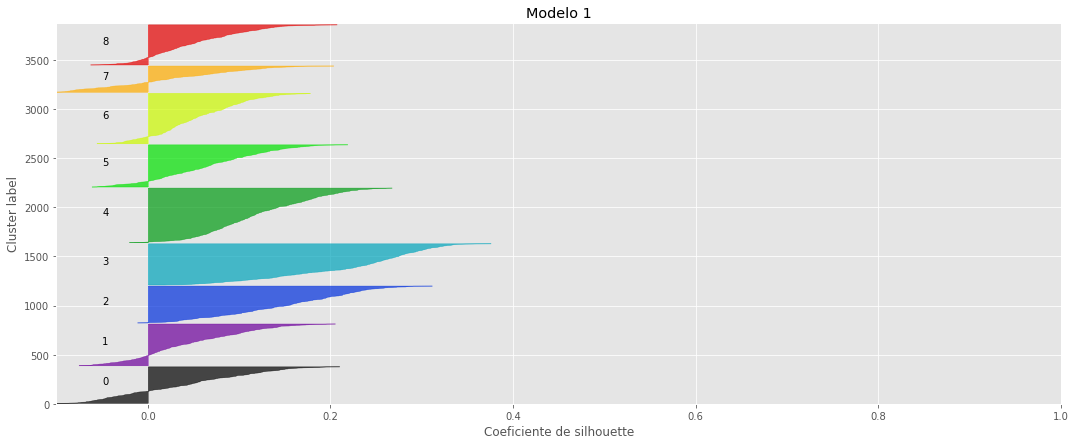

In [113]:
Lista_ = [("Modelo 1",DF1,kmeans1.labels_),
           ("Modelo 2",DF2,kmeans2.labels_),
           ("Modelo 3",DF3,kmeans3.labels_),
           ("Modelo 4",DF4,kmeans4.labels_),
           ("Modelo 6",DF6,kmeans6.labels_) ]

for (Modelo, Data_DF, label_DF) in Lista_:
  # Estimar el coeficiente de Silhouette para cada cluster
  #
  cluster_labels = label_DF
  n_clusters=len(np.unique(cluster_labels))
  ith_cluster_silhouette_avg = []

  sample_silhouette_values = silhouette_samples(Data_DF,label_DF)

  print(Modelo , ": Coeficiente de Silhouette para cada cluster")
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values)) 

  print(pd.DataFrame(ith_cluster_silhouette_avg))

  fig, ax1 = plt.subplots(1, 1)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(Data_DF) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Cluster label")
  ax1.set_title(Modelo)
  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

In [114]:
!pip install gower
import gower

Vamos a construir una matriz de distancias de Gower para los datos personales, y realizamos un cluster jerárquico para tener una primera impresión sobre cómo se agrupan los datos.
¿Qué se puede decir de la presencia de grupos en el dataset?

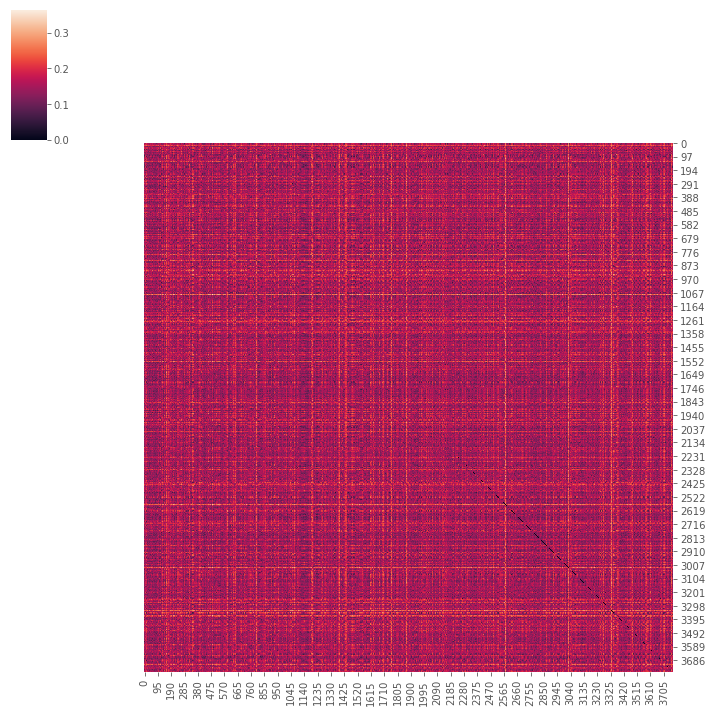

In [115]:
d_meta_total= DF1
d_meta_total = gower.gower_matrix(d_meta_total)
sns.clustermap(d_meta_total,row_cluster=False,col_cluster=False)

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:630: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


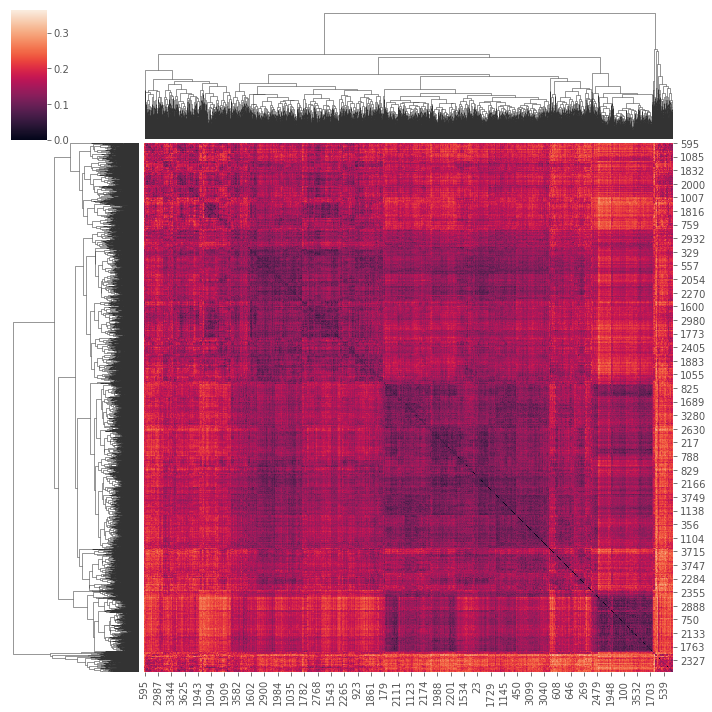

In [116]:
sns.clustermap(d_meta_total)

#### PAM
Para agrupar los datos datos vamos a usar el método PAM, y como desconocemos el mejor valor de K a utilizar, vamos a probar varios y después usar los gráficos de SSE vs. k y Silhouette vs. k.
En el loop de más abajo se recorren los valores de k desde 2 hasta el máximo número de k (cantidad de clusters) que se van a probar. En cada iteración se calcula un nuevo PAM y con sus medoides se calcula el SSE y Silhouette.

In [117]:
!pip install scikit-learn-extra 
from sklearn_extra.cluster import KMedoids 
from sklearn.metrics import silhouette_samples, silhouette_score

In [118]:
def calcula_sse_kmedoids(KM,d):
  se = []
  for i in range(0,KM.n_clusters):
    se.append(sum(d[KM.medoid_indices_[i],KM.labels_==i]**2))
  return sum(se)

In [ ]:
# codigo de kmedioides 
#KM_meta=KMedoids(n_clusters=4,metric='precomputed',init='k-medoids++').fit(d_meta_total)

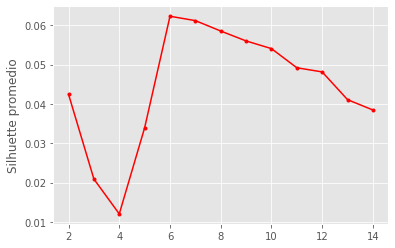

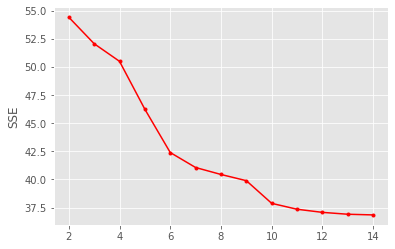

In [119]:
range_k = [i for i in range(2,15)]
silh = []
sse = []
for k in range_k:
   # KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='k-medoids++').fit(d_meta_total)
    KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)

    silh.append(silhouette_score(d_meta_total,KM_meta.labels_,metric='precomputed'))
    sse.append(calcula_sse_kmedoids(KM_meta,d_meta_total))

plt.plot(range_k,silh,'r.-')
plt.ylabel('Silhuette promedio')
plt.show()

plt.plot(range_k,sse,'r.-')
plt.ylabel('SSE')
plt.show()


In [120]:
import matplotlib.cm as cm

def grafica_silhouette(KM,d):
  silhouette_avg = silhouette_score(d,KM.labels_,metric='precomputed')
  sample_silhouette_values = silhouette_samples(d,KM.labels_,metric='precomputed')

  plt.rcParams['figure.figsize'] = (8,6)
  plt.xlim([-0.1, 1])
  plt.ylim([0, len(KM.labels_) + (k + 1) * 10])

  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = sample_silhouette_values[KM.labels_ == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                "with k = %d" % k),
                fontsize=14, fontweight='bold')
  plt.xlabel("The silhouette coefficient values")
  plt.ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  plt.axvline(x=silhouette_avg, color="red", linestyle="--")

  plt.yticks([])  # Clear the yaxis labels / ticks
  plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


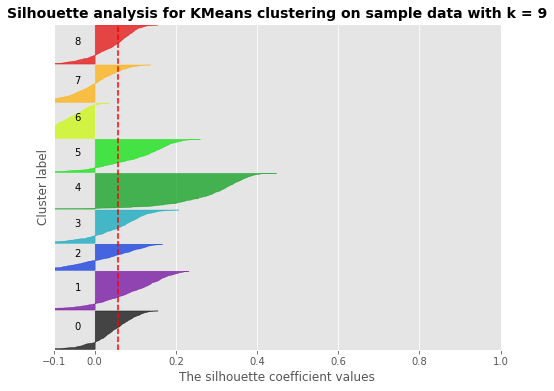

In [162]:
df_total_2= df_total
df_total_2=df_total_2.dropna()
df_total_2['genre_num']=pd.factorize(df_total_2.genre)[0]

grafica_silhouette_2(df_total_2['genre_num'],d_meta_total)

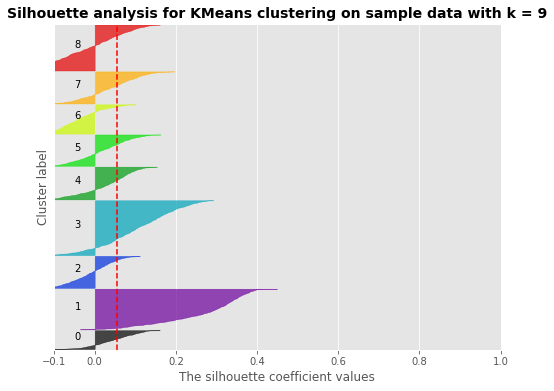

In [130]:
k = 9
KM_meta = KMedoids(n_clusters=k,metric='precomputed',init='heuristic').fit(d_meta_total)
grafica_silhouette(KM_meta,d_meta_total)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import squareform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


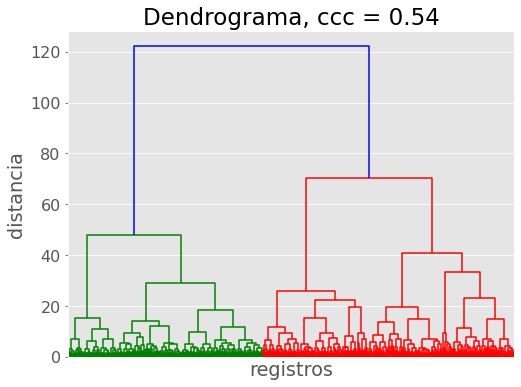

In [ ]:
Z = linkage(d_meta_total, 'ward')
c,_=cophenet(Z,Y=squareform(d_meta_total))
plt.title('Dendrograma, ccc = %0.2f'%c)
plt.xlabel('registros')
plt.ylabel('distancia')
dn = dendrogram(Z,no_labels=True)

([<matplotlib.axis.XTick at 0x7ffbb17df9b0>,
 <a list of 9 Text major ticklabel objects>)

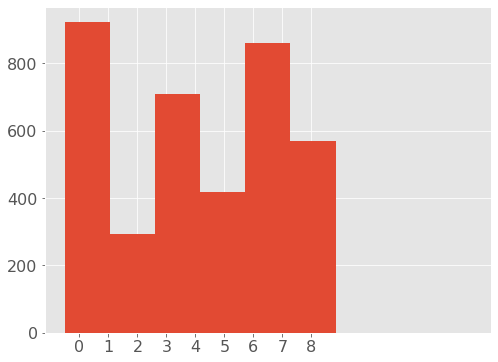

In [ ]:
plt.hist(KM_meta.labels_,bins=9,range=[-0.5,13.5])
plt.xticks(np.arange(0,9))

Veamos los valores que toman los prototipos

In [ ]:
df_total.iloc[KM_meta.medoid_indices_]

,id,mp0,mp1,mp2,mp3,mp4,mp5,mp6,mp7,mp8,mp9,mp10,mp11,sdp0,sdp1,sdp2,sdp3,sdp4,sdp5,sdp6,sdp7,sdp8,sdp9,sdp10,sdp11,mt0,mt1,mt2,mt3,mt4,mt5,mt6,mt7,mt8,mt9,mt10,mt11,sdt0,sdt1,sdt2,sdt3,sdt4,sdt5,sdt6,sdt7,sdt8,sdt9,sdt10,sdt11,mt0_norm,artists,genre,release_date,album_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,speechiness_log,liveness_log,valence_log,valence_logit,acousticness_logit,instrumentalness_logit,energy_logit,loudness_logit
2400,4d3XHYFFuYYzxWr2cJ6yQl,0.277964,0.153597,0.128906,0.168818,0.410648,0.255727,0.203215,0.191572,0.255926,0.322722,0.153697,0.254091,0.760406,0.529087,0.463930,0.511576,0.786263,0.708447,0.599167,0.540395,0.653797,0.803908,0.499200,0.699199,0.487806,0.501600,0.463029,0.570050,0.529299,0.495493,0.609165,0.432964,0.535843,0.527786,0.474949,0.497944,0.458762,0.436006,0.494010,0.569864,0.437774,0.461876,0.703346,0.296801,0.565805,0.394389,0.472537,0.607695,0.395768,Tommy Flanagan,jazz,1991,Master Trio,0.514799,0.144793,0.584505,0.060910,0.879518,0.830303,0.134744,0.144162,0.512862,-1.149292,-0.839398,-0.812021,-1.702321,2.085828,1.660484,-1.697495,0.382622
2955,5hxwbMY9Wqa89AClZOX5KC,0.545516,0.122551,0.124583,0.334802,0.137357,0.101116,0.231129,0.645047,0.390132,0.110017,0.186497,0.227351,0.924378,0.351968,0.266400,0.831263,0.317300,0.407598,0.445165,0.766461,0.717417,0.363347,0.559978,0.428005,0.544878,0.445825,0.212523,0.153843,0.425981,0.457540,0.527497,0.324515,0.652972,0.357289,0.611270,0.589212,0.307988,0.264970,0.251302,0.259361,0.233594,0.256925,0.272118,0.345495,0.241498,0.458903,0.268788,0.258522,0.421134,Nick Drake,singer-songwriter,1969,Five Leaves Left,0.512685,0.118725,0.553359,0.039207,0.856426,0.666667,0.096541,0.090457,0.535959,-1.307977,-0.972483,-0.998020,-2.192159,1.869719,0.738495,-1.912275,0.254804
3083,5woh1sxJAvif6YheMtAdid,0.397483,0.665239,0.533613,0.576002,0.936331,0.458929,0.249400,0.279663,0.217971,0.181275,0.189772,0.391347,0.538264,0.744831,0.569663,0.682180,0.494135,0.597228,0.387553,0.434194,0.500646,0.521141,0.490946,0.593154,0.593317,0.539825,0.302030,0.309582,0.302954,0.313250,0.411800,0.410032,0.399094,0.478983,0.857795,0.694669,0.199480,0.486565,0.337116,0.246334,0.338852,0.303080,0.654465,0.294011,0.505486,0.500388,0.243947,0.556020,0.439796,Carbon Based Lifeforms,ambient,2003,Hydroponic Garden,0.575053,0.529786,0.615674,0.043057,0.518072,0.863636,0.109964,0.040102,0.465703,-1.275256,-0.920950,-1.300149,-2.942304,0.112407,1.933500,0.159483,0.513702
3505,6lNUewdE3ZY4vUMxXpHtIC,0.209256,0.412487,0.126332,0.150679,0.074547,0.445544,0.248978,0.123423,0.191132,0.112356,0.629157,0.136526,0.577167,0.865202,0.292531,0.588400,0.220927,0.802264,0.736484,0.349537,0.536272,0.309793,0.930194,0.368255,0.524285,0.411407,0.346942,0.270657,0.464455,0.441167,0.483423,0.486218,0.605057,0.564869,0.797638,0.469092,0.424994,0.438605,0.528841,0.397808,0.454008,0.310669,0.326594,0.300849,0.306447,0.411596,0.238079,0.223335,0.411301,Deaf Center,ambient,2005,Pale Ravine,0.265328,0.075013,0.552374,0.037923,0.924699,0.887879,0.079195,0.132995,0.396682,-1.319456,-1.049661,-0.844679,-1.790635,2.661214,2.173875,-2.376111,0.250804
2518,4qvMZBtrZxZlUl9nPR2p0y,0.407139,0.512846,0.469744,0.345716,0.311801,0.321634,0.355308,0.519622,0.380562,0.262174,0.313922,0.277504,0.717021,0.673561,0.668809,0.549906,0.539174,0.645481,0.664459,0.851734,0.625891,0.590903,0.678469,0.576429,0.709621,0.719374,0.223765,0.287962,0.311893,0.542056,0.502563,0.457597,0.593284,0.471696,0.401681,0.371488,0.400121,0.353934,0.517043,0.539843,0.389493,0.474687,0.425014,0.469589,0.453881,0.621404,0.457283,0.383998,0.488771,Sublime,ska,1992,40oz To Freedom (Explicit Version),0.749471,0.439553,0.775651,0.049242,0.000458,0.013737,0.109964,0.465990,0.438420,-1.227374,-0.920950,-0.322402,-0.096115,-4.549891,-3.716681,-0.202475,1.298909
1696,3Dv8mXHPhKwkLDDTzyGvjC,0.258303,0.424585,0.519110,0.256386,0.349973,0.250301,0.343999,0.316252,0.346659,0.464416,0.373701,0.349658,0.5